In [99]:
from mpl_toolkits.axes_grid1 import host_subplot
import seaborn as sns
import pandas as pd
from math import log
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import numpy as np

In [34]:
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title

In [2]:
df=pd.read_csv('MEV_JL_new.csv')

In [53]:
colors=['#2a9d8f','#E9C46A','#e76f51','#264653']
methods=['1.5 * log n','1.5 * log n ** 3','n(n-1)/2']
nrange=[*range(5,9)]
names=[r'MEV0-JL-1.5ln $n$',r'MEV0-JL-1.5ln$^3n$','MEV0']

pal=dict(zip(methods,colors[:len(methods)]))

In [5]:
rank=[]
for num in range(5,9):
    error=df[(df['met']=='1.5 * log n')&(df['the number of candidates']==num)]['RP_error'].tolist()
    #dfsub[dfsub['the number of candidates']==5]
    #rank=np.argsort(error)[::-1]
    rank+=[[24*(num-5)+i*3,24*(num-5)+i*3+1] for i in np.argsort(error)[::-1]]

df_sort=df.loc[list(np.concatenate(rank).flat)]

In [6]:
df_sort

,runtime,RP_error,entropy,met,the number of candidates
9,0.032959,0.241919,4.776717,1.5 * log n,5.0
10,0.046479,0.125580,4.733259,1.5 * log n ** 3,5.0
3,0.031236,0.150225,4.783886,1.5 * log n,5.0
4,0.026823,0.075157,4.770054,1.5 * log n ** 3,5.0
12,0.026511,0.145653,4.787085,1.5 * log n,5.0
...,...,...,...,...,...
79,3.405861,0.068776,10.596909,1.5 * log n ** 3,8.0
81,2.584637,0.029410,10.604593,1.5 * log n,8.0
82,3.138803,0.023334,10.603992,1.5 * log n ** 3,8.0
90,2.579065,0.013699,10.604580,1.5 * log n,8.0


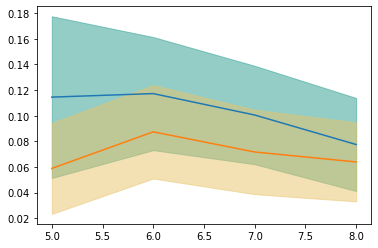

In [8]:
pivot=pd.pivot_table(df,index=['the number of candidates','met'],values=['RP_error'],aggfunc=[np.mean,np.std])

x=[*range(5,9)]
for met in methods[0:2]:
    y0=np.array([pivot[('mean','RP_error')][(num,met)] for num in x])
    y1=np.array([pivot[('std','RP_error')][(num,met)] for num in x])

    plt.plot(x,y0)
    plt.fill_between(x,y0-y1,y0+y1,alpha=0.5,color=pal[met])

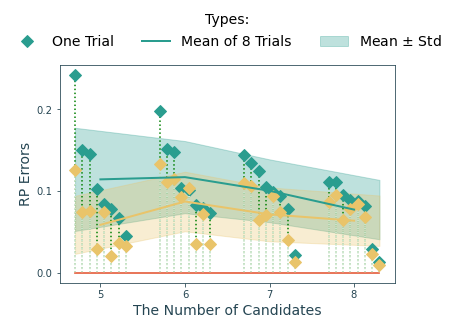

In [74]:
gap=0.3

x0=[x+y for x in range(5,9) for y in np.linspace(-0.3,0.3,num=8).tolist()] #np.linspace(5,9, num=16, endpoint=True, retstep=False, dtype=None, axis=0)
y0=df_sort[df_sort['met']=='1.5 * log n']['RP_error'].tolist()
#z0=[y+gap for y in y0]

#x1=[x+gap for x in x0]
y1=df_sort[df_sort['met']=='1.5 * log n ** 3']['RP_error'].tolist()
#z1=[y+gap for y in y1]

fig, ax = plt.subplots()
markers0, stemlines, baseline = plt.stem(
    x0, y0,linefmt ='g:',basefmt=colors[2],
    bottom = 0, use_line_collection = False)

markers1, stemlines, baseline = plt.stem(
    x0, y1,linefmt ='w:',basefmt=colors[2],
    bottom = 0, use_line_collection = False)

plt.setp(markers0, marker='D', markersize=8,markerfacecolor=colors[0],markeredgecolor=colors[0],label='One Trial')
plt.setp(markers1, marker='D', markersize=8,markerfacecolor=colors[1],markeredgecolor=colors[1])

x=[*range(5,9)]
for met in methods[0:2]:
    y0=np.array([pivot[('mean','RP_error')][(num,met)] for num in x])
    y1=np.array([pivot[('std','RP_error')][(num,met)] for num in x])

    if met == methods[0]:
        plt.plot(x,y0,color=pal[met],linewidth=2,label='Mean of 8 Trials')
        plt.fill_between([4.7,6,7,8.3],y0-y1,y0+y1,alpha=0.3,color=pal[met],label=r'Mean $\pm$ Std')
    
    else: 
        plt.plot(x,y0,color=pal[met],linewidth=2)
        plt.fill_between([4.7,6,7,8.3],y0-y1,y0+y1,alpha=0.3,color=pal[met])

plt.yticks([0.0,0.1,0.2],color=colors[3])
plt.xticks([x for x in range(5,9)],labels=[*range(5,9)],color=colors[3])
#plt.set_xticklabels([*range(5,9)])

plt.ylabel('RP Errors',fontsize=14,color=colors[3])
plt.xlabel('The Number of Candidates',fontsize=14,color=colors[3])

plt.legend(fontsize=14,frameon=False,ncol=3,loc='upper center',bbox_to_anchor=(0.5, 1.3),title = "Types:",title_fontsize=14)

# Set the borders to a given color
ax.tick_params(color=colors[3], labelcolor=colors[3])
for spine in ax.spines.values():
    spine.set_edgecolor(colors[3])

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.savefig("JL_ERROR.pdf",bbox_inches='tight')

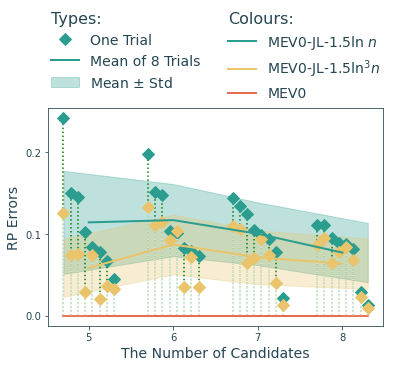

In [204]:
gap=0.3

x0=[x+y for x in range(5,9) for y in np.linspace(-0.3,0.3,num=8).tolist()] #np.linspace(5,9, num=16, endpoint=True, retstep=False, dtype=None, axis=0)
y0=df_sort[df_sort['met']=='1.5 * log n']['RP_error'].tolist()
#z0=[y+gap for y in y0]

#x1=[x+gap for x in x0]
y1=df_sort[df_sort['met']=='1.5 * log n ** 3']['RP_error'].tolist()
#z1=[y+gap for y in y1]

fig, ax = plt.subplots(figsize=(6,4))
markers0, stemlines, baseline = ax.stem(
    x0, y0,linefmt ='g:',basefmt=colors[2],
    bottom = 0, use_line_collection = False)

markers1, stemlines, baseline = ax.stem(
    x0, y1,linefmt ='w:',basefmt=colors[2],
    bottom = 0, use_line_collection = False)

plt.setp(markers0, marker='D', markersize=8,markerfacecolor=colors[0],markeredgecolor=colors[0],label='One Trial')
plt.setp(markers1, marker='D', markersize=8,markerfacecolor=colors[1],markeredgecolor=colors[1])

x=[*range(5,9)]
for met in methods[0:3]:
    y0=np.array([pivot[('mean','RP_error')][(num,met)] for num in x])
    y1=np.array([pivot[('std','RP_error')][(num,met)] for num in x])

    #if met == methods[0]:
    ax.plot(x,y0,color=pal[met],linewidth=2,label='Mean of 8 Trials')
    ax.fill_between([4.7,6,7,8.3],y0-y1,y0+y1,alpha=0.3,color=pal[met],label=r'Mean $\pm$ Std')
    
    #else: 
    #    ax.plot(x,y0,color=pal[met],linewidth=2)
    #    ax.fill_between([4.7,6,7,8.3],y0-y1,y0+y1,alpha=0.3,color=pal[met])

plt.yticks([0.0,0.1,0.2],color=colors[3])
plt.xticks([x for x in range(5,9)],labels=[*range(5,9)],color=colors[3])
#plt.set_xticklabels([*range(5,9)])

plt.ylabel('RP Errors',fontsize=14,color=colors[3])
plt.xlabel('The Number of Candidates',fontsize=14,color=colors[3])

h, l = ax.get_legend_handles_labels()
ax.legend(['Types:'] + h[0:2]+ h[4:5] + ['','Colours:'] + h[1:4],
          ['']          + l[0:2]+ l[4:5] + ['','']          + names,
          handler_map={str: LegendTitle({'fontsize': 16,'color':colors[3]})},
          fontsize=14,frameon=False,ncol=2,loc='upper center',bbox_to_anchor=(0.5,1.5),labelcolor=colors[3])
#plt.legend(fontsize=14,frameon=False,ncol=1,loc='center left',bbox_to_anchor=(1,0.8),title = "Types:",title_fontsize=16)

# Set the borders to a given color
ax.tick_params(color=colors[3], labelcolor=colors[3])
for spine in ax.spines.values():
    spine.set_edgecolor(colors[3])

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.savefig("JL_ERROR.pdf",bbox_inches='tight')

# Runtime

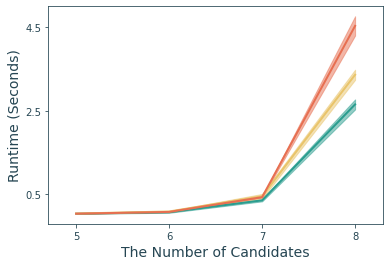

In [209]:
x=[*range(5,9)]
i=0

fig, ax = plt.subplots(figsize=(6,4))
for m in methods:
    df_tem=df[df['met']==m]
    
    #mean_ent=df_tem.groupby('the number of candidates').mean()['entropy']
    #std_ent=df_tem.groupby('the number of candidates').std()['entropy']

    #par.bar([xi+i*0.1 for xi in x],mean_ent,color=colors[i])

    mean_runtime=df_tem.groupby('the number of candidates').mean()['runtime']
    std_runtime=df_tem.groupby('the number of candidates').std()['runtime']

    plt.plot(x,mean_runtime,color=pal[m],linewidth=2)
    plt.fill_between(x,mean_runtime-std_runtime,mean_runtime+std_runtime, color=pal[m],alpha=0.5)
    i+=1

plt.xticks([j for j in range(5,9)],labels=x,color=colors[3])
plt.ylabel('Runtime (Seconds)',fontsize=14,color=colors[3])
plt.xlabel('The Number of Candidates',fontsize=14,color=colors[3])

# Set the borders to a given color
ax.tick_params(color=colors[3], labelcolor=colors[3])
for spine in ax.spines.values():
    spine.set_edgecolor(colors[3])
ax.set_xlim([4.7,8.3])
ax.set_yticks([0.5,2.5,4.5])
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
    
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

#plt.legend(names, fontsize=14,loc='upper center',frameon=False,ncol=3,bbox_to_anchor=(0.5, 1.32),title = "Colours:",title_fontsize=14)

plt.savefig("JL_RUNTIME.pdf",bbox_inches='tight')

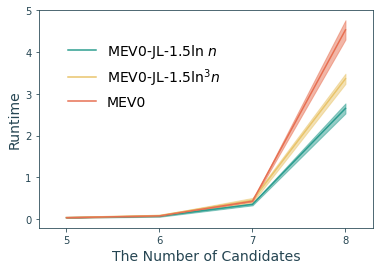

In [197]:
x=[*range(5,9)]
i=0

fig, ax = plt.subplots()
for m in methods:
    df_tem=df[df['met']==m]
    
    #mean_ent=df_tem.groupby('the number of candidates').mean()['entropy']
    #std_ent=df_tem.groupby('the number of candidates').std()['entropy']

    #par.bar([xi+i*0.1 for xi in x],mean_ent,color=colors[i])

    mean_runtime=df_tem.groupby('the number of candidates').mean()['runtime']
    std_runtime=df_tem.groupby('the number of candidates').std()['runtime']

    plt.plot(x,mean_runtime,color=colors[i])
    plt.fill_between(x,mean_runtime-std_runtime,mean_runtime+std_runtime, color=colors[i],alpha=0.5)
    i+=1

plt.xticks([j for j in range(5,9)],labels=x,color=colors[3])
plt.ylabel('Runtime',fontsize=14,color=colors[3])
plt.xlabel('The Number of Candidates',fontsize=14,color=colors[3])

# Set the borders to a given color
ax.tick_params(color=colors[3], labelcolor=colors[3])
for spine in ax.spines.values():
    spine.set_edgecolor(colors[3])
ax.set_xlim([4.7,8.3])
    
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.legend(names, fontsize=14,loc='center left',frameon=False,bbox_to_anchor=(0.05, 0.7),)

#plt.savefig("JL_RUNTIME.pdf",bbox_inches='tight')

# Entropy

# Dimension

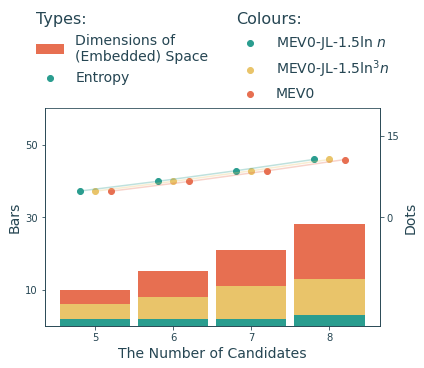

In [190]:
x=[*range(5,9)]
y0=[int(1.5*log(n)) for n in x]
y1=[int((1.5*log(n)**3)) for n in x]
y2=[int(n*(n-1)/2) for n in x]
width = 0.9
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x,y2,width,color=colors[2],label=names[2])
ax.bar(x,y1,width,color=colors[1],label=names[1])
ax.bar(x,y0, width,color=colors[0],label=names[0])

par=ax.twinx()
i=0
for m in methods:
    df_tem=df[df['met']==m]

    mean_ent=df_tem.groupby('the number of candidates').mean()['entropy']
    std_ent=df_tem.groupby('the number of candidates').std()['entropy']

    par.scatter([xi+i*0.2-0.2 for xi in x],mean_ent,color=colors[i],label=names[i])
    plt.errorbar([xi+i*0.2-0.2 for xi in x],mean_ent,yerr=std_ent,color=colors[i],alpha=0.3)
    i+=1

ax.set_ylim([0,60])
par.set_ylim([-20,20])
ax.set_yticks([10,30,50])
par.set_yticks([0,15])
ax.set_ylabel('Bars',fontsize=14,color=colors[3])
par.set_ylabel('Dots',fontsize=14,color=colors[3])
#ax.set_xticks(x, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.xticks([x for x in range(5,9)],labels=[*range(5,9)],color=colors[3])
ax.set_xticklabels([*range(5,9)],color=colors[3])

ax.tick_params(color=colors[3], labelcolor=colors[3])
for spine in ax.spines.values():
    spine.set_edgecolor(colors[3])
ax.spines['top'].set_visible(False)

par.tick_params(color=colors[3], labelcolor=colors[3])
for spine in par.spines.values():
    spine.set_edgecolor(colors[3])

ax.set_xlabel('The Number of Candidates',fontsize=14,color=colors[3])

h, l = ax.get_legend_handles_labels()
ph, pl = par.get_legend_handles_labels()
plt.legend(['Types:'] + h[0:1]+ph[0:1]+['','Colours:'] + ph[0:3],
          ['']+['Dimensions of\n(Embedded) Space','Entropy']+['','']+names,
          handler_map={str: LegendTitle({'fontsize': 16,'color':colors[3]})},
          fontsize=14,frameon=False,ncol=2,loc='upper center',bbox_to_anchor=(0.5,1.5),labelcolor=colors[3])

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.savefig("JL_ENTROPY.pdf",bbox_inches='tight')

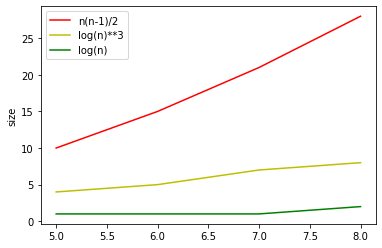

In [10]:
x=[*range(5,9)]
y0=[int(n*(n-1)/2) for n in x]
y1=[int((log(n)**3)) for n in x]
y2=[int(log(n)) for n in x]
plt.plot(x,y0,label='n(n-1)/2',c='r')
plt.plot(x,y1,label='log(n)**3',c='y')
plt.plot(x,y2,label='log(n)',c='g')
plt.legend()
plt.ylabel('size')
plt.show()